<a href="https://colab.research.google.com/github/hiya906/my-machine-learning/blob/master/word2vec_%EC%8B%A4%EC%8A%B5_190717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install Library

In [1]:
import nltk
nltk.download("all")
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [0]:
import pandas as pd
from nltk.corpus import stopwords
import re
from gensim.models import Word2Vec
import numpy as np
import xgboost

##2. Data Load

In [3]:
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

print(train)

                 tweet_id  ...                user_timezone
0      569753797704024065  ...                          NaN
1      569603156927246336  ...   Eastern Time (US & Canada)
2      569564566272811008  ...   Eastern Time (US & Canada)
3      570296986827694080  ...  Mountain Time (US & Canada)
4      569376145000390656  ...                          NaN
5      570044554130423808  ...   Central Time (US & Canada)
6      568629791869394945  ...   Eastern Time (US & Canada)
7      569605022197153792  ...                          NaN
8      567768224607911936  ...                          NaN
9      567663136082513920  ...                       London
10     568920244691070976  ...                          NaN
11     569674356915347456  ...   Eastern Time (US & Canada)
12     568104907384832000  ...   Eastern Time (US & Canada)
13     570267592478191617  ...   Central Time (US & Canada)
14     569667675603009537  ...                          NaN
15     570011200613806082  ...          

## 3. 데이터 개수 확인하기

In [4]:
a = train["airline_sentiment"].to_list()
index, count = np.unique(a, return_counts=True)
print(index)
print(count)

b = test["airline_sentiment"].to_list()
index, count = np.unique(b, return_counts=True)
print(index)
print(count)

['negative' 'neutral' 'positive']
[8254 2797 2125]
['negative' 'neutral' 'positive']
[924 302 238]



## 4. 데이터 시각화하기

(13176,)


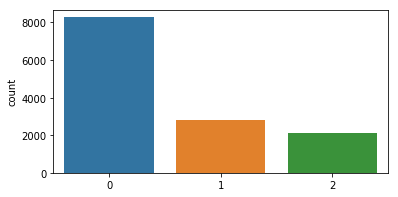

In [5]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

le = preprocessing.LabelEncoder()
seniment_num = le.fit_transform(train["airline_sentiment"]) # Label에 자동으로 알아서 번호 매겨줌
print(seniment_num.shape)

fig, e = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(seniment_num)

## 5. Tweet 길이에 대한 통계값

In [6]:
train_length = train["text"].apply(len)

print('트윗 길이 최대값: {}'.format(np.max(train_length)))
print('트윗 길이 평균값: {}'.format(np.mean(train_length)))
print('트윗 길이 표준편차: {}'.format(np.std(train_length)))
print('트윗 길이 중간값: {}'.format(np.median(train_length)))
print('트윗 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('트윗 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

트윗 길이 최대값: 186
트윗 길이 평균값: 103.71174863387978
트윗 길이 표준편차: 36.29367249847811
트윗 길이 중간값: 114.0
트윗 길이 제1사분위: 77.0
트윗 길이 제3사분위: 136.0


## 6. 데이터 Word Cloud로 표현해보기

(-0.5, 799.5, 599.5, -0.5)

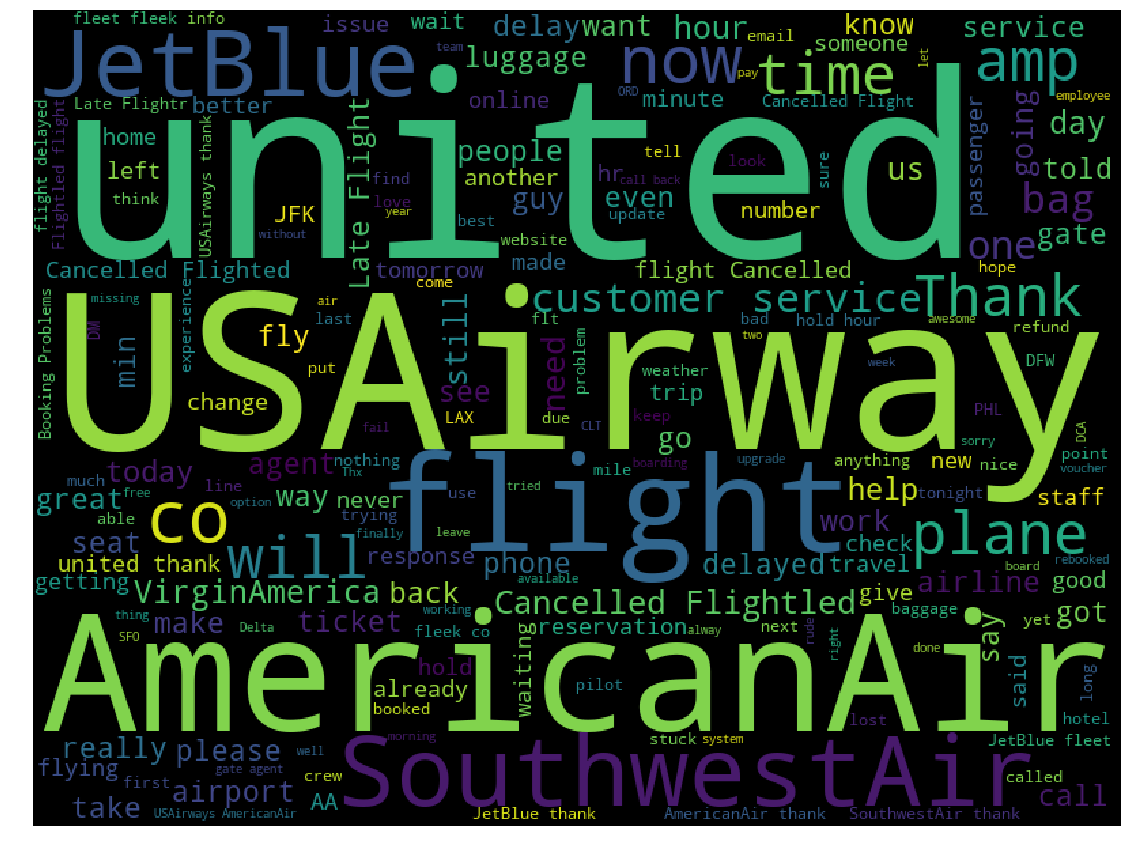

In [7]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train["text"].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

##7. Tweet 길이에 따른 분포표 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

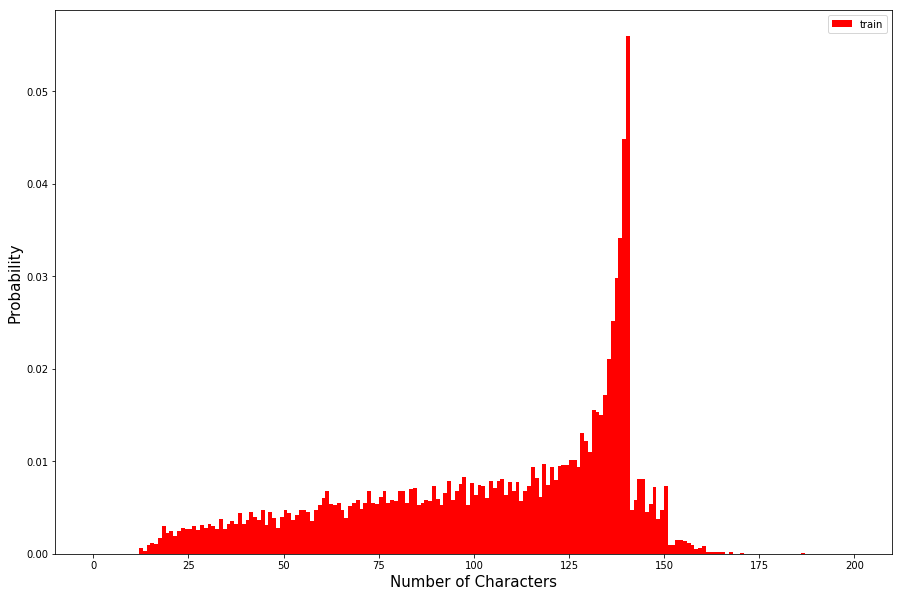

In [8]:
train_length = train["text"].apply(len)
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', normed=True, label='train')
plt.legend()
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

## 8. 문장을 토큰으로 분리하기 (word2vec 사용)

In [0]:
from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import word_tokenize
# def tokenize_row(row):
# #     row["text"] = word_tokenize(row["text"])
# #     row["tokenized_text"] = [] + row["text"]
#     row["tokenized_text"] = word_tokenize(row["text"])
#     return row
def tokenize_row(row):
  tknzr = TweetTokenizer(reduce_len=True)
  row["tokenized_text"] = tknzr.tokenize(row["text"])
  return row

In [10]:
# train_list=train['text'].to_list()
# for i in range(0, len(train_list)):
#   print(train_list[i])
train = train.apply(tokenize_row, axis=1)
test = test.apply(tokenize_row, axis=1)
print(train.shape)
print(test.shape)

(13176, 16)
(1464, 16)


In [11]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

total_moment = []
for i in train["tokenized_text"]:
  total_moment.append(i)
  
for i in test["tokenized_text"]:
  total_moment.append(i)
  
print(total_moment)
word2vec_model = Word2Vec(train["tokenized_text"], size=300, window=3)
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word2vec_model.intersect_word2vec_format(fname=EMBEDDING_FILE, binary=True)

#word2vec_model = Word2Vec(total_moment, size=512)
# word2vec_model = Word2Vec(train["tokenized_text"], size=512)
print(word2vec_model.wv.vocab)

--2019-07-17 01:53:11--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.29|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

[['@united', 'Yes', 'I', 'did', '.', 'We', 'headed', 'out', 'to', 'de-ice', '5', 'minutes', 'after', 'I', 'sent', 'it', 'to', 'you', '.', 'Made', 'it', 'to', 'Austin', ',', 'but', 'am', 'now', 'waiting', 'for', 'the', 'luggage', '.'], ['@AmericanAir', 'missing', 'a', 'full', 'days', 'of', 'work', 'thanks', 'guys'], ['@USAirways', 'your', 'mobile', 'app', 'is', 'horrible', '!', 'Needs', 'a', 'major', 'overhaul'], ['@AmericanAir', 'Checked', 'in', 'on', 'app', 'since', 'yesterday', '.', 'Confirmed', 'upgrade', '&', 'carry', 'on', ',', 'got', 'to', 'counter', '&', 'manager', 'upgraded', 'somebody', 'else', 'on

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'@united': <gensim.models.keyedvectors.Vocab object at 0x7f9fb0c28e10>, 'Yes': <gensim.models.keyedvectors.Vocab object at 0x7f9fb0c28eb8>, 'I': <gensim.models.keyedvectors.Vocab object at 0x7f9fb0c288d0>, 'did': <gensim.models.keyedvectors.Vocab object at 0x7f9fac8dbba8>, '.': <gensim.models.keyedvectors.Vocab object at 0x7f9fac745390>, 'We': <gensim.models.keyedvectors.Vocab object at 0x7f9facdcbf98>, 'headed': <gensim.models.keyedvectors.Vocab object at 0x7f9fac8e2898>, 'out': <gensim.models.keyedvectors.Vocab object at 0x7f9fac754b70>, 'to': <gensim.models.keyedvectors.Vocab object at 0x7f9fac7544a8>, 'de-ice': <gensim.models.keyedvectors.Vocab object at 0x7f9fac738208>, '5': <gensim.models.keyedvectors.Vocab object at 0x7f9fac738390>, 'minutes': <gensim.models.keyedvectors.Vocab object at 0x7f9fac8c5a20>, 'after': <gensim.models.keyedvectors.Vocab object at 0x7f9fac8cf2b0>, 'sent': <gensim.models.keyedvectors.Vocab object at 0x7f9fac8cf0b8>, 'it': <gensim.models.keyedvectors.Voca

In [12]:
# print(train_moment)
print(len(total_moment))
print(len(train["tokenized_text"]))
print(word2vec_model)

14640
13176
Word2Vec(vocab=3459, size=300, alpha=0.025)


In [0]:
def get_vector(word):
  if word not in word2vec_model.wv.vocab:
    return None
  return word2vec_model.wv.syn0[word2vec_model.wv.vocab[word].index]

In [14]:
#rows = []
rows=np.zeros((len(total_moment),300),dtype=float)
i=0
for tokens in total_moment:
  current_word2vec = []
  for _, word in enumerate(tokens):
    vec = get_vector(word.lower())
    if vec is not None:
      current_word2vec.append(vec)
  averaged_word2vec = np.array(current_word2vec).mean(axis=0)
  #rows.append(averaged_word2vec)
  rows[i]=averaged_word2vec
  i+=1
  #print(averaged_word2vec)
  
# print(rows)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [15]:
# !wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

rowLen = len(train['tokenized_text'])

dataArray=rows[:rowLen]
print(dataArray.shape)
testArray=rows[rowLen:]
print(testArray.shape)
#dataArray= []
msg = train['tokenized_text'].to_list()

#for i in range(0, rowLen):
#   dataArray.append(preprocess_to_words(msg[i]))
  #dataArray.append(rows[i])
  


(13176, 300)
(1464, 300)


In [0]:
from xgboost import XGBClassifier as XGBoostClassifier
from xgboost import plot_importance
from matplotlib import pyplot

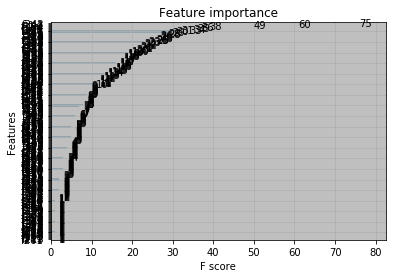

In [17]:
model = XGBoostClassifier()
model.fit(dataArray, train['airline_sentiment'])
plot_importance(model)
pyplot.show()

In [0]:
result = model.predict(testArray)

In [19]:
print(np.array(test["airline_sentiment"]))
print(result)

['positive' 'negative' 'negative' ... 'positive' 'negative' 'negative']
['positive' 'negative' 'negative' ... 'positive' 'negative' 'negative']


In [20]:
"""## 평가하기(Evaluation)"""

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

real_value = np.array(test["airline_sentiment"])
predict_value = result

acc = accuracy_score(real_value, predict_value)
print(classification_report(real_value, predict_value))
print("accuracy = ", acc)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86       924
     neutral       0.63      0.37      0.47       302
    positive       0.77      0.55      0.64       238

    accuracy                           0.76      1464
   macro avg       0.73      0.62      0.65      1464
weighted avg       0.75      0.76      0.74      1464

accuracy =  0.7629781420765027
